In [427]:
import numpy as np
import os
import matplotlib.pyplot as plt
from importlib import reload
import AHM
reload(AHM)
#n=0
date = '080825'

In [428]:
k = np.linspace(0, 2*np.pi, 40)

In [429]:
n

27

In [430]:
n+=1
da=7
db=0
dc=-da
na=0
nb=0
nc=na
mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, nA=na, nB=nb, nC=nc, U=2, UB=2, muB=0, mu=0, t=1, inhomp=True, inhomi=True)
alpha=0.8
vals = mM.Deltra(k, Nmax=150, Nmin=30, alpha=alpha)



0 1
[[ 0. +0.j -2. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j
   0. +0.j -3.5+0.j  0. +0.j  0. +0.j]
 [-2. +0.j  0. +0.j -2. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j
   0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j -2. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j
   0. +0.j  0. +0.j  0. +0.j  3.5+0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j -2. +0.j  0. +0.j  3.5+0.j  0. +0.j
   0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j -2. +0.j  0. +0.j -2. +0.j  0. +0.j  0. +0.j
   0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j -2. +0.j  0. +0.j  0. +0.j  0. +0.j
  -3.5+0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  3.5+0.j  0. +0.j  0. +0.j  0. +0.j  2. +0.j
   0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  2. +0.j  0. +0.j
   2. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j -3.5+0.j  0. +0.j  2. +0.j
   0. +0.j  0. +0.

In [431]:
dels = vals[0]
nus = vals[2]

In [432]:
vals[1]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.17568235, 0.17191594, 0.16792977, 0.16374509,
       0.15936198, 0.15476159, 0.1499155 , 0.14478737, 0.13934605,
       0.13356305, 0.12742799, 0.12094009, 0.11412653, 0.10702599,
       0.09970967, 0.09231307, 0.08486303, 0.07745518, 0.07027351,
       0.06335008, 0.05685771, 0.0507997 , 0.04531577, 0.0403713 ,
       0.03606357, 0.03232265, 0.02920259, 0.02660638, 0.02454786,
       0.02291454, 0.02169011, 0.02076453, 0.02010999, 0.01963727,
       0.0193233 , 0.01910674, 0.01897449, 0.01888894, 0.0188448 ,
       0.0188205 , 0.01881507, 0.01881653, 0.01882575, 0.01883617,
       0.01884918, 0.01886121, 0.0188736 , 0.01888439, 0.01889469,
       0.01890344, 0.01891147, 0.01891819, 0.01892421, 0.01892921,
       0.01893363, 0.01893729, 0.01894048, 0.01894312, 0.01894541,
       0.01894729, 0.01894892, 0.01895026, 0.01895142, 0.01895237,
       0.01895318, 0.01895385, 0.01895443, 0.0189549 , 0.01895

In [433]:
dels[:,-5:]

array([[ 3.06565241e-01+0.j,  3.12432796e-01+0.j,  3.06565241e-01+0.j,
         3.12432796e-01+0.j,  3.06565241e-01+0.j],
       [ 2.43556022e-04+0.j, -2.43556022e-04+0.j,  2.43556022e-04+0.j,
        -2.43556022e-04+0.j,  2.43556022e-04+0.j],
       [-3.12432796e-01+0.j, -3.06565241e-01+0.j, -3.12432796e-01+0.j,
        -3.06565241e-01+0.j, -3.12432796e-01+0.j]])

In [434]:
s1 = [np.sum(nus[:,i]) for i in range(np.shape(nus)[1])]


In [435]:
fol = f'calc{date}_{n}'
newpath = r"C:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\Pictures\scf\'"+fol

if not os.path.exists(newpath):
    os.makedirs(newpath)

filename = "parameters.txt"

text = os.path.join(newpath, filename)

with open(text, "w") as file:
    file.write(f"mM = AHM.Model(Del0A, Del0B, Del0C= {dels[:,0]}, nA, nB, nC={nus[:,0]}, U={mM.U}, UB={mM.UB}, mu={mM.mu}, muB={mM.muB}, t={mM.t}, inhomp={mM.inhomp}, inhomi={mM.inhomi})\n alpha={alpha}\n dels: {dels}\nnus: {nus}")
    file.close

c:\Users\atsch\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\atsch\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


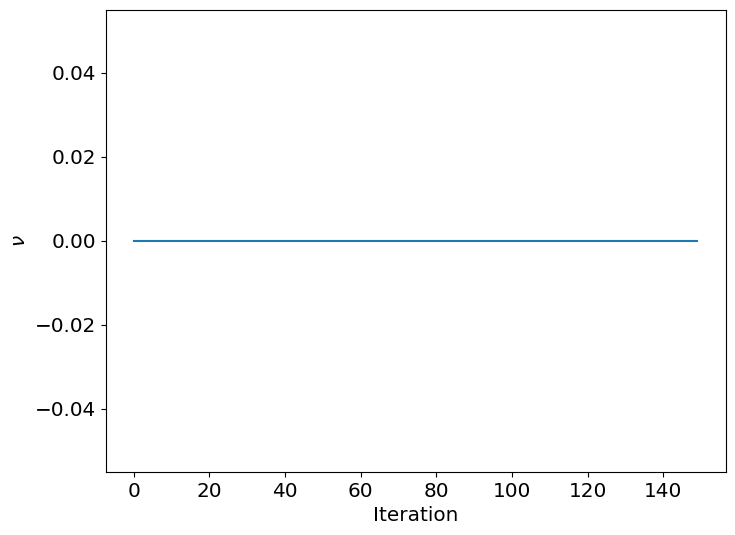

In [436]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\nu$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

plt.plot(np.arange(len(s1)), s1, label = r'no hopping')


#plt.legend()
plt.savefig(newpath+"//nu.png")
plt.show()

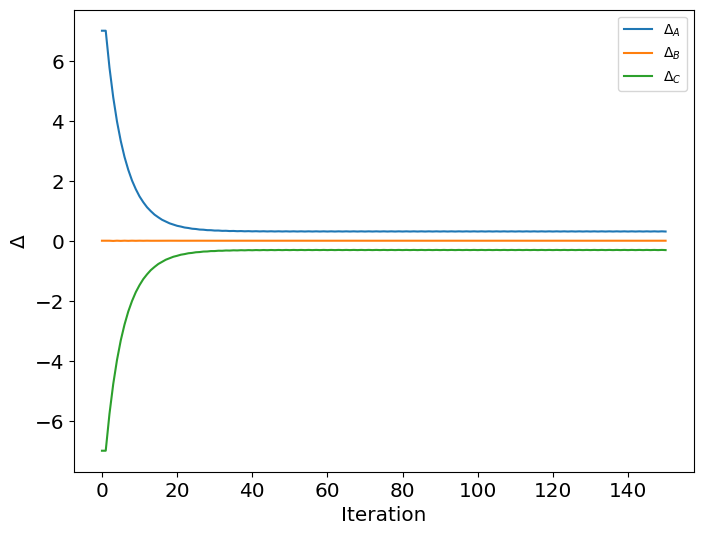

In [437]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\Delta$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

plt.plot(np.arange(len(dels[0])), dels[0], label = r'$\Delta_A$')
plt.plot(np.arange(len(dels[0])), dels[1], label = r'$\Delta_B$')
plt.plot(np.arange(len(dels[0])), dels[2], label = r'$\Delta_C$')
#plt.plot(np.arange(len(dels[0])), np.abs(dels[0]), label = r'$\Delta_A$')
#plt.plot(np.arange(len(dels[0])), np.abs(dels[1]), label = r'$\Delta_B$')
#plt.plot(np.arange(len(dels[0])), np.abs(dels[2]), label = r'$\Delta_C$')

plt.legend()
plt.savefig(newpath+"//dels.png")

plt.show()

In [438]:
da, db, dc = dels[:,-1]
na, nb, nc = nus[:,-1]
#mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, nA=na, nB=nb, nC=nc,mu=0, U=3, t=1, inhomp=False, inhomi=True)
H = mM.HBdG()
k = np.linspace(0, 2*np.pi, 100)

k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*2*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = mM.solvHam(kx, ky)

np.shape(energies)
emax = np.amax(energies)
emax = emax+0.1*emax

In [439]:
energies.T

array([[-2.83345373, -2.83345373, -2.83186105, ...,  2.83186105,
         2.83345373,  2.83345373],
       [-2.83270403, -2.83270403, -2.83118904, ...,  2.83118904,
         2.83270403,  2.83270403],
       [-2.83045663, -2.83045663, -2.82917488, ...,  2.82917488,
         2.83045663,  2.83045663],
       ...,
       [-2.82776772, -2.82776772, -2.82617502, ...,  2.82617502,
         2.82776772,  2.82776772],
       [-2.83203186, -2.83203186, -2.83043918, ...,  2.83043918,
         2.83203186,  2.83203186],
       [-2.83345373, -2.83345373, -2.83186105, ...,  2.83186105,
         2.83345373,  2.83345373]])

In [440]:
np.savetxt(newpath +"//dels.txt", dels, delimiter=",")
np.savetxt(newpath +"//nus.txt", nus, delimiter=",")
np.savetxt(newpath +"//energies.txt", energies, delimiter=",")

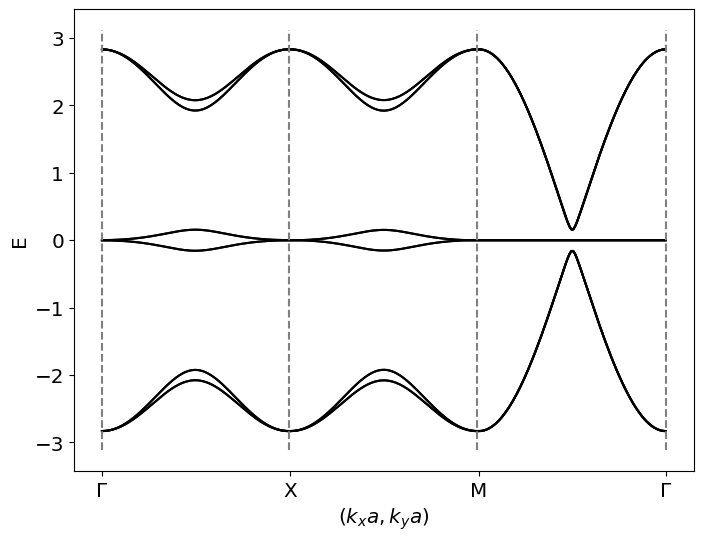

In [441]:
plt.figure(figsize=(8,6))
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-0.5, 0.5))

for i in energies:
    plt.plot(p, i, color='black')
#for i in energies2:
#    plt.plot(p, i, color='green', linestyle='dashdot')
#plt.plot(p, energies4[0], color='black', label=r'$\Delta_0=0.5$')
#plt.plot(p, energies2[0], color='green', linestyle='dashdot', label=r'$\Delta_0=1$')

plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)
#plt.legend(fontsize='x-large')
#plt.savefig("Pictures/ESCpath.png")
plt.savefig(newpath+"//bands.png")

plt.show()

In [442]:
mM.Hk(0,0)

array([[ 0.00000000e+00+0.j, -2.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        -1.56216398e-01+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j],
       [-2.00000000e+00+0.j,  0.00000000e+00+0.j, -2.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  1.21778011e-04-0.j,  0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j, -2.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  1.53282621e-01-0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j, -2.00000000e+00+0.j,  0.00000000e+00+0.j,
   

In [446]:
Earr = np.linspace(-1.5,1.5,250)
DOS = mM.DOS(Earr, k, sig=0.03)
DOS[0]

1023.5221512828799

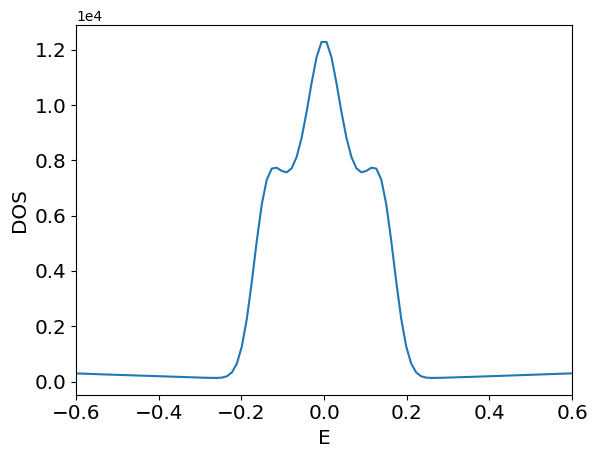

In [447]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
plt.xlim(-0.6, 0.6)
plt.plot(Earr, DOS)

#plt.vlines([emax, -emax], 0, 100, colors='black')
#plt.legend()
#plt.savefig("Pictures/DOS_SC.png")
plt.show()